In [1]:
%matplotlib inline
%pylab inline
import pprint
pylab.rcParams['figure.figsize'] = (10, 6)
from datetime import datetime, date, time
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(10, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/albertw/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:

daterangestr=""
def read_csv():
    global daterangestr
    def dateparse(x):
        return datetime.combine(d, datetime.strptime(x, '%H:%M:%S').time())

    files = !ls /Users/albertw/Dropbox/MeteorEvents/event*txt
    dflist = []
    for filename in files:
        #print("Parsing " + str(filename))
        d = datetime.strptime(os.path.basename(filename)[9:17], '%Y%m%d')
        try:
            dflist.append(pd.read_csv(filename, 
                 parse_dates = ['Time'], 
                 names = ["Time", "Hour Event", "Doppler", "x", "y", "Duration"],
                 date_parser = dateparse,
                 index_col = "Time"))
        except ValueError as e:
            print "Error with " + filename + " " + str(e)
    df = pd.concat(dflist)
    daterangestr = str(df.index.date.min())+' to ' + str(df.index.date.max()) +'.'
    return df

In [3]:
def plot_counts_by_hour(df):
    """ Plot a histogram of the counts per hour"""
    fig, ax = plt.subplots()
    ax.set_title('Histogram of Meteor counts by hour.')
    ax.set_xlabel('Hour of Day (half hour bins)')
    ax.set_ylabel('Number of counts')
    ax.set_xticks(range(0,24), minor=False)
    ax.set_xticklabels(range(0,24), minor=False)
    df['Hour'] = (df.index.hour + df.index.minute/60.0)
    df.hist("Hour", bins=47, ax=ax,alpha=0.9)
    plt.title('Histogram of Meteor counts by hour from ' + daterangestr)


In [4]:
def plot_durations(df):
    """ Plot a histogram of meteor durations"""
    fig, ax = plt.subplots()
    ax.set_title('Histogram of Meteor Durations.')
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Number of counts (log10)')
    ax.set_yscale('log')
    df.hist("Duration", ax=ax, bins=50,alpha=0.9)
    plt.title('Histogram of Meteor Durations ' + daterangestr)


In [95]:
def plot_heatmap(df):
    """ Plot a heatmap of counts per hour per day."""
    df["Date"] = df.index.date
    df["Hour"] = df.index.hour

    df2 = pd.DataFrame(df.Date.unique(),columns=["Date"])
    heatdata = {}
    for d in df2["Date"]:
        c2 = df[df["Date"] == d]
        heatdata[d]=[]
        count =  Counter(c2["Hour"])
        daydata = []
        for hour in range(0,24):
            daydata.append(count[hour])
        heatdata[d] = daydata


    df3 = pd.DataFrame(data=heatdata)
    df3.sort_index(ascending=False,inplace=True)
    fig, ax = plt.subplots()

    cmap = plt.cm.jet
    cmap.set_under(color='black')
    heatmap = ax.pcolor(df3,cmap=cmap,vmin=1)
    cbar = fig.colorbar(heatmap)
    
    fig = plt.gcf()
    
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(df3.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(df3.shape[1]) - 1.5, minor=False)

    ax.set_yticklabels(reversed(range(0,24)), minor=False)
    ax.set_xticklabels(df3.columns, minor=False, rotation=45)

    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    ax.set_title('Heatmap of Meteor counts by hour over time.')
    ax.set_ylabel('Hour of Day.')
    ax.set_xlabel('Date.')
    cbar.ax.set_title('# Meteors.')


In [96]:
def plot_counts_per_day(df):
    """ Plot a heatmap of counts per hour per day."""
    df["Date"] = df.index.date

    df2 = pd.DataFrame(df.Date.unique(),columns=["Date"])

    daydata={}
    for d in df2["Date"]:
        c2 = df[df["Date"] == d]
        daydata[d]=len(c2)
    df3 = pd.DataFrame(data=daydata,index=["Counts"]).T
    fig, ax = plt.subplots()
    ax.set_title('Meteor counts per day.')
    ax.set_xlabel('Date.')
    ax.set_ylabel('Counts.')
    df3.plot(ax=ax)


Error with /Users/albertw/Dropbox/MeteorEvents/event_log20170318.txt time data '0' does not match format '%H:%M:%S'


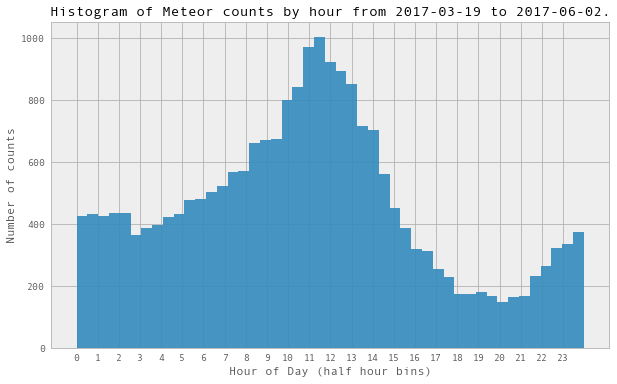

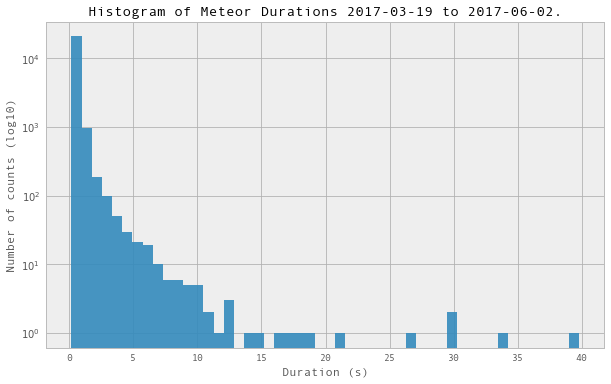

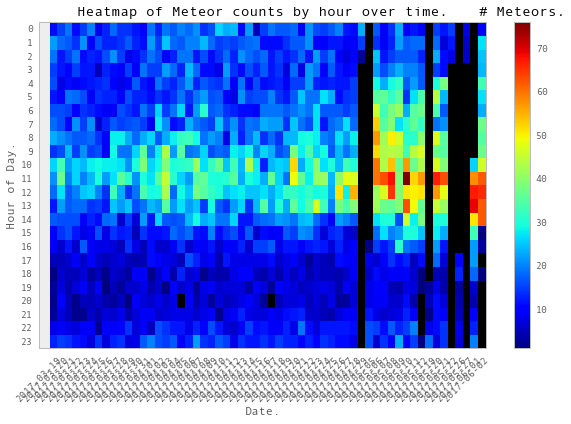

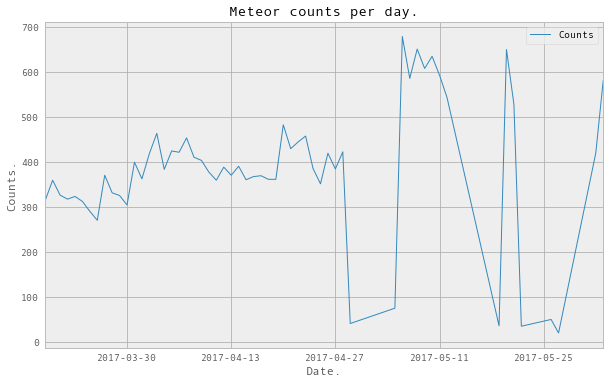

In [97]:
df = read_csv()
plot_counts_by_hour(df)
plot_durations(df)
plot_heatmap(df)
plot_counts_per_day(df)

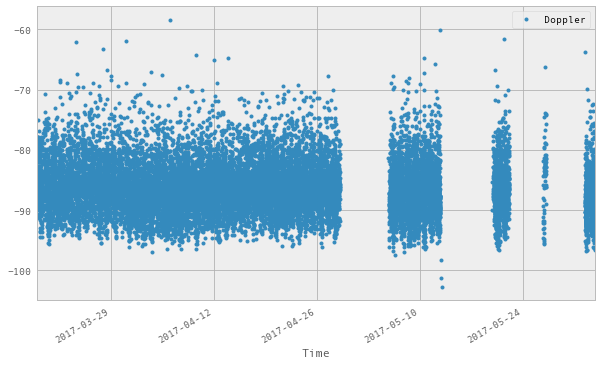

In [67]:
# Scatter plot of Doppler
df2 = df.reset_index()
df2.plot(x='Time', y='Doppler', style=".")


In [48]:
# Times of the longest events
df.sort_values(['Duration'], inplace=True)
df[-10:]

,Hour Event,Doppler,x,y,Duration,Hour,Date
Time,,,,,,,
2017-04-22 13:18:36,9,-88.5,-105.6,2276,16.55,13,2017-04-22
2017-05-06 04:27:42,18,-82.7,-108.4,2280,17.58,4,2017-05-06
2017-03-24 00:41:05,15,-79.3,-105.0,2295,18.09,0,2017-03-24
2017-06-01 10:40:09,11,-81.3,-102.8,2298,19.11,10,2017-06-01
2017-05-11 10:37:47,25,-86.5,-105.7,2299,21.33,10,2017-05-11
2017-05-06 06:47:14,34,-90.0,-108.4,2264,26.79,6,2017-05-06
2017-04-23 02:24:58,11,-85.6,-104.5,2293,29.69,2,2017-04-23
2017-05-10 06:05:35,1,-86.7,-104.8,2286,29.86,6,2017-05-10
2017-05-12 08:49:50,33,-87.5,-108.4,2283,33.62,8,2017-05-12


# The following cells are to try and determine what images have events and to remove the others. Work in progress...

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

year = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
value = np.random.rand(23)

ser =  pd.Series(index = year,data=value)
df =ser.to_frame()
df.reset_index(inplace=True)
#df.columns = ['year','value']
df.columns

Index([u'index', 0], dtype='object')

In [ ]:
#http://stackoverflow.com/questions/1819124/image-comparison-algorithm
# SLOW
import scipy as sp
from scipy.misc import imread
from scipy.signal.signaltools import correlate2d as c2d

def get(i):
     # get JPG image as Scipy array, RGB (3 layer)
     data = imread(i)
     # convert to grey-scale using W3C luminance calc
     data = sp.inner(data, [299, 587, 114]) / 1000.0
     # normalize per http://en.wikipedia.org/wiki/Cross-correlation
     return (data - data.mean()) / data.std()

im1 = get("screenshots/17/04/05/event170405024200.jpg")
im2 = get("screenshots/17/04/05/event170405024500.jpg")
im3 = get("screenshots/17/04/05/event170405025100.jpg")

c11 = c2d(im1, im1, mode='same')
c12 = c2d(im1, im2, mode='same')
c13 = c2d(im1, im3, mode='same')
c11.max(), c12.max(), c13.max()

In [3]:
from PIL import Image
from PIL import ImageChops
from matplotlib.pyplot import imshow

import math
import operator


def rmsdiff(im1, im2):
    "Calculate the root-mean-square difference between two images"

    h = ImageChops.difference(im1, im2).histogram()

    # calculate rms
    #return math.sqrt(reduce(operator.add, map(lambda h, i: h*(i**2), h, h.keys())) 
    #    / (float(im1.size[0]) * im1.size[1]))
    return math.sqrt(sum(h*(i**2) for i, h in enumerate(h))) / (float(im1.size[0]) * im1.size[1])

def cmp(h1, h2):
    rms = math.sqrt(reduce(operator.add,
        map(lambda a,b: (a-b)**2, h1, h2))/len(h1))
    return rms

im1 = "screenshots/17/04/05/event170405024200.jpg" #empty
im2 = "screenshots/17/04/05/event170405024500.jpg" #empty
im3 = "screenshots/17/04/05/event170405025100.jpg" #1 hit
im4 = "screenshots/17/04/05/event170405025359.jpg" #2hits
im5 = "screenshots/17/04/05/event170405030000.jpg" #empty


i1 = Image.open(im1).convert('1').crop((0, 400, 1200, 590))
i2 = Image.open(im2).convert('1').crop((0, 400, 1200, 590))
i3 = Image.open(im3).convert('1').crop((0, 400, 1200, 590))
i4 = Image.open(im4).convert('1').crop((0, 400, 1200, 590))
i5 = Image.open(im5).convert('1').crop((0, 400, 1200, 590))

h1 = i1.histogram()
h2 = i2.histogram()
h3 = i3.histogram()
h4 = i4.histogram()
h5 = i5.histogram()

print "Raw hist"
print h1[0]
print h2[0]
print h3[0]
print h4[0]
print h5[0]

print "cmp"
print cmp(h1,h1)
print cmp(h1,h2)
print cmp(h1,h3)
print cmp(h1,h4)
print cmp(h1,h5)
print

print"Histograms"
for i in [i2,i3,i4,i5]:
    h1i = ImageChops.difference(i1, i).histogram() 
    print "hist[0]: " + str(h1i[0])
    df = pd.DataFrame(data=h1i)
    #df.plot()
    
print "rmsdiff"
print rmsdiff(i1,i1)
print rmsdiff(i1,i2)
print rmsdiff(i1,i3)
print rmsdiff(i1,i4)
print rmsdiff(i1,i5)
#imshow(i1)
#imshow(ImageChops.difference(i1, i3))


#imshow(np.asarray(Image.open(im1)))
#imshow(Image.open(im1))

Raw hist
222285
222317
221761
221006
222354
cmp
0.0
2.82842712475
46.3141447076
113.048662089
6.0827625303

Histograms
hist[0]: 218812
hist[0]: 218550
hist[0]: 217571
hist[0]: 217745
rmsdiff
0.0
0.107205193909
0.108722952506
0.114215926534
0.11325911553


In [ ]:
from PIL import Image
from PIL import ImageChops
from matplotlib.pyplot import imshow
import math
import operator
from os import listdir, makedirs
from shutil import move
files = !ls screenshots/17/04/13/*

reference = "screenshots/17/04/05/event170405024200.jpg"
base = Image.open(reference).convert('1').crop((0, 400, 1200, 590)).histogram()[0]
print "BASE " + str(base)
for f in files:
    hist = Image.open(f).convert('1').crop((0, 400, 1200, 590)).histogram()[0]
    if hist < base:
        #print f + " probably has a meteor"
    else:
        #print f + " is probably clear"
        
        try:
            cleardir = "screenshots/17/04/13/clear"
            makedirs(cleardir)
        except OSError:
            #dir already exists
            pass
        move(f, cleardir)
        

,Hour Event,Doppler,x,y,Duration
Time,,,,,
2017-04-22 13:18:36,9,-88.5,-105.6,2276,16.55
2017-05-06 04:27:42,18,-82.7,-108.4,2280,17.58
2017-03-24 00:41:05,15,-79.3,-105.0,2295,18.09
2017-06-01 10:40:09,11,-81.3,-102.8,2298,19.11
2017-05-11 10:37:47,25,-86.5,-105.7,2299,21.33
2017-05-06 06:47:14,34,-90.0,-108.4,2264,26.79
2017-04-23 02:24:58,11,-85.6,-104.5,2293,29.69
2017-05-10 06:05:35,1,-86.7,-104.8,2286,29.86
2017-05-12 08:49:50,33,-87.5,-108.4,2283,33.62
